
#### 1. Download the data from <a href='https://drive.google.com/file/d/15dCNcmKskcFVjs7R0ElQkR61Ex53uJpM/view?usp=sharing'>here</a>. 

<pre>
<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>

In [1]:
import sklearn

In [2]:
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras import *
import tensorflow as tf
from tensorflow.keras.utils import *
from sklearn.metrics import f1_score,roc_auc_score
import numpy as np

In [3]:
import os
os.chdir("/home/ubuntu/drive_kodakandlasrikar99/aaic data")
data=pd.read_csv('data.csv')
x=data.drop('label',axis=1).to_numpy()
y=data['label'].to_numpy()

In [4]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="{epoch:02d}-{val_loss:.2f}.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

class TerminateNaN(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss') 
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True

earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

plateau=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=1,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)


def scheduler(epoch,lr):
    if (epoch+1)%3==0: 
        lr=0.95*lr  
        return lr
    else:
        return lr

schedule=tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

class custom_metric(tf.keras.callbacks.Callback):
    def __init__(self,x,y):
        self.y=y
        self.x=x
    def on_epoch_end(self,epoch,log={}):
        pred=self.model.predict(self.x)
        log['micro_f1_score']=f1_score(self.y,pred.round(0),average='micro')
        log['auc_score']=roc_auc_score(self.y,pred)
        
metric=custom_metric(x,y)


In [5]:
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir="logs8",
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
)
print('storing Logs for tensorboard in following directory : ',os.getcwd())

storing Logs for tensorboard in following directory :  /home/ubuntu/drive_kodakandlasrikar99/aaic data


In [6]:
inputs=Input(x.shape[1],name='Input_Layer')
layer0=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name="Dense1")(inputs)
layer1=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense2')(layer0)
layer2=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense3')(layer1)
layer3=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense4')(layer2)
layer4=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense5')(layer3)
outputs=Dense(1,name='output_layer',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0.,maxval=1.),activation='sigmoid')(layer4)
model=Model(inputs,outputs)
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD"),loss='binary_crossentropy',metrics=['accuracy'])

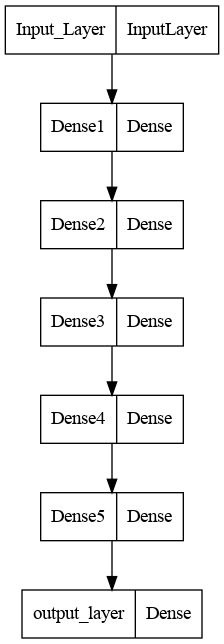

In [7]:
plot_model(model)

In [8]:
%load_ext tensorboard
!rm -rf ./logs8/ 
%tensorboard --logdir './logs8' --host "0.0.0.0" --port 6006

In [9]:
model.fit(x,y,callbacks=[model_checkpoint_callback,earlystopping,metric,plateau,TerminateNaN(),tensorboard,schedule],epochs=30,validation_split=0.2)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/30
500/500 [==============================] - 5s 10ms/step - loss: 0.8903 - accuracy: 0.4972 - val_loss: 0.6930 - val_accuracy: 0.5160 - micro_f1_score: 0.5034 - auc_score: 0.5068 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/30
500/500 [==============================] - 2s 5ms/step - loss: 0.6934 - accuracy: 0.5003 - val_loss: 0.6938 - val_accuracy: 0.4863 - micro_f1_score: 0.5000 - auc_score: 0.4935 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.000949999934528023.
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6937 - val_accuracy: 0.4863 - micro_f1_score: 0.5003 - auc_score: 0.4958 - lr: 9.5000e-05


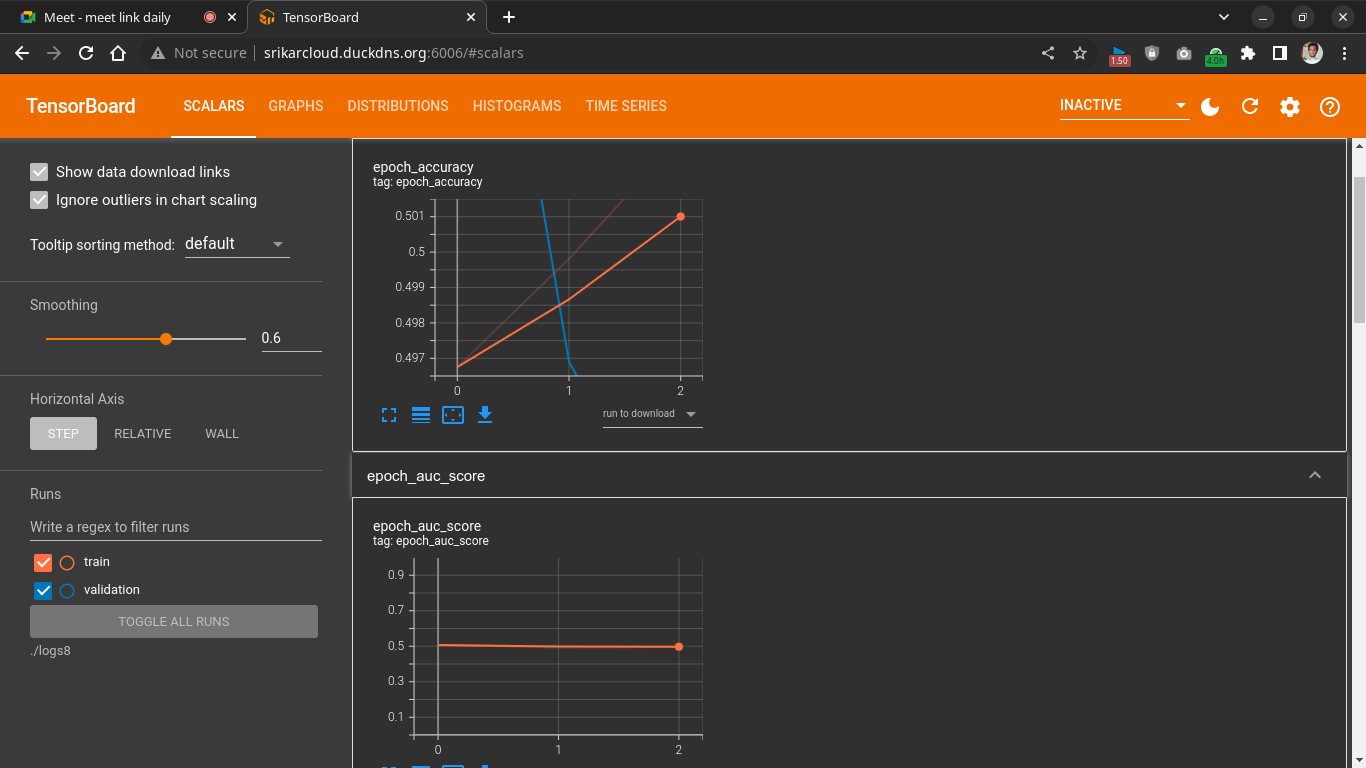
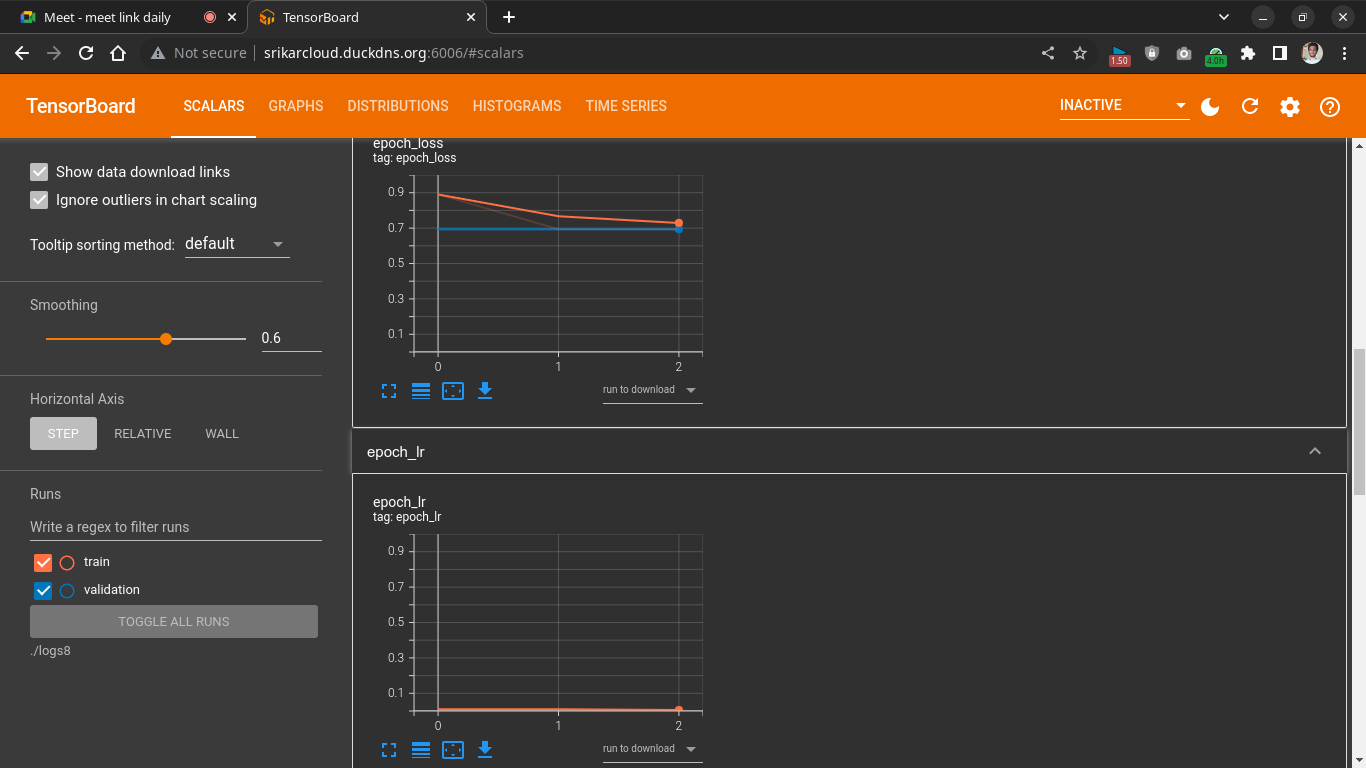
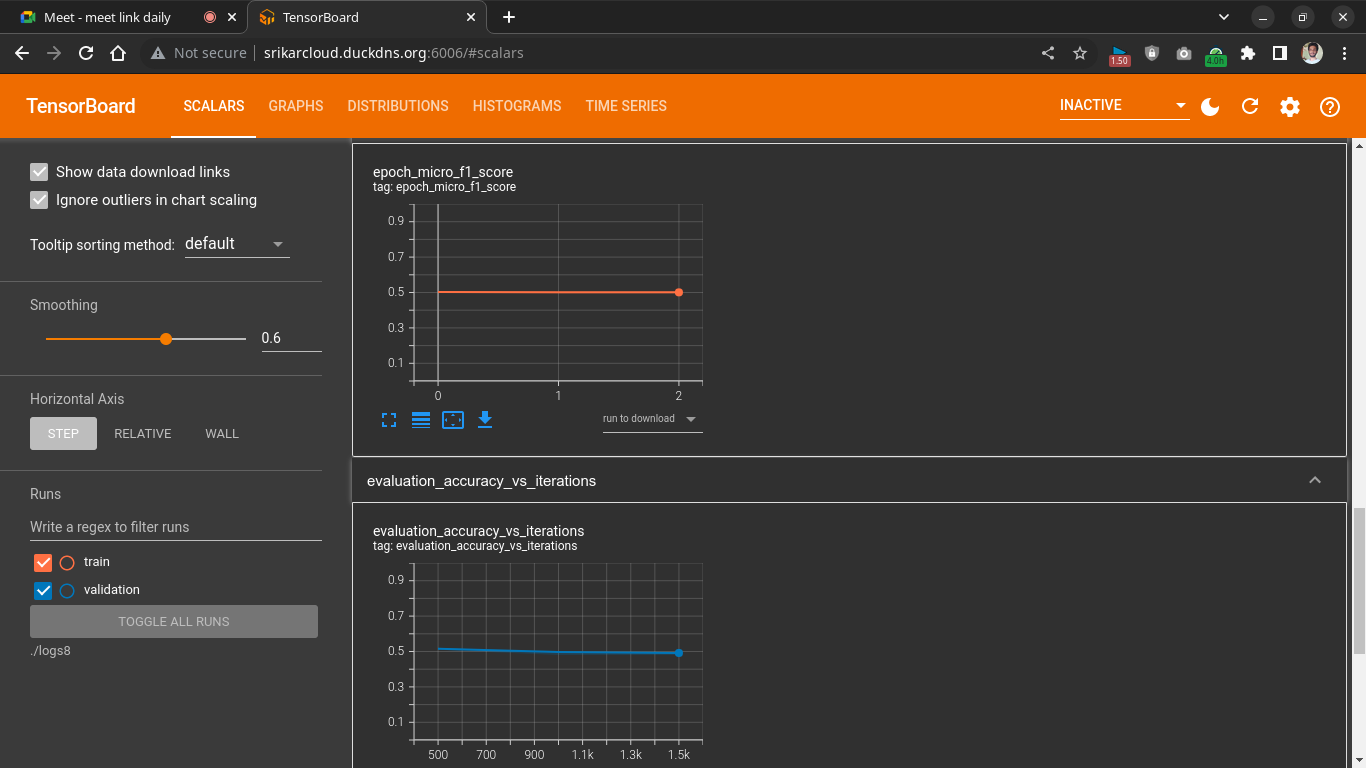
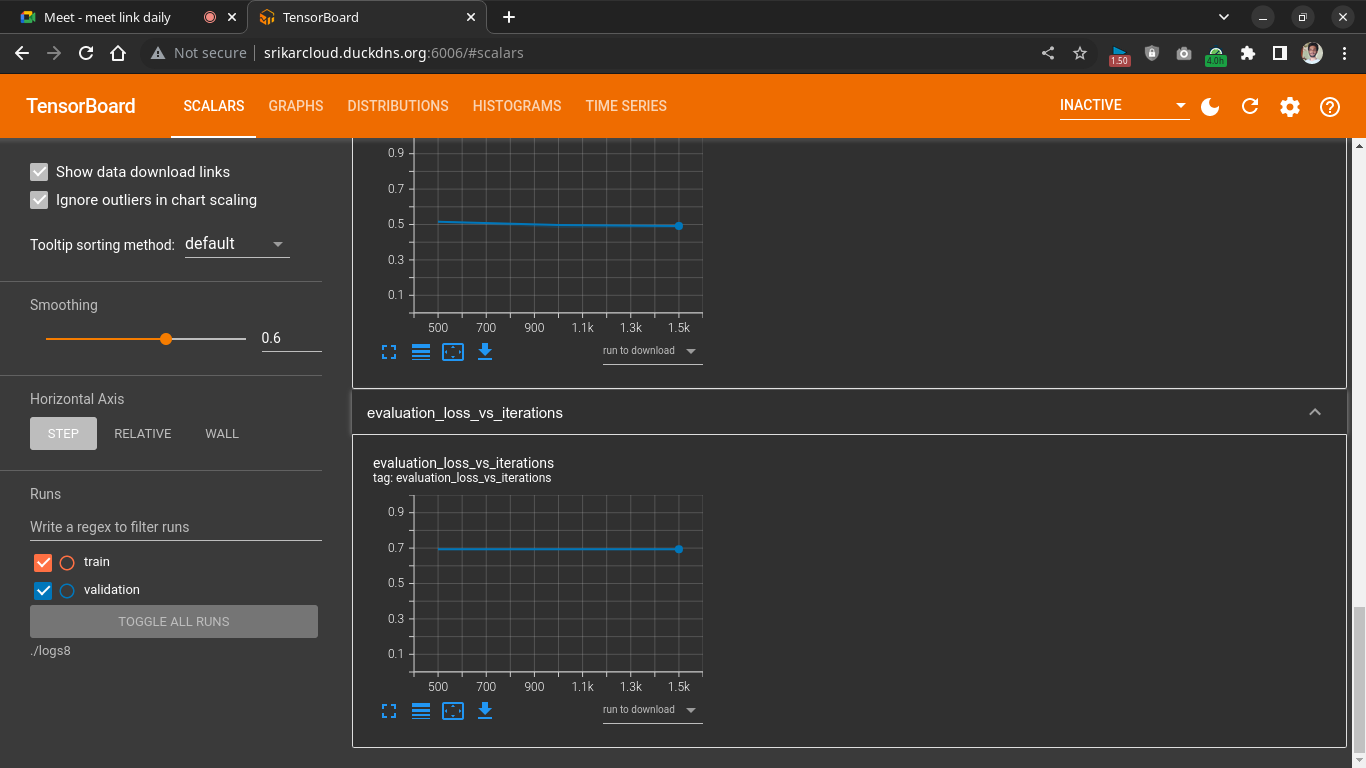
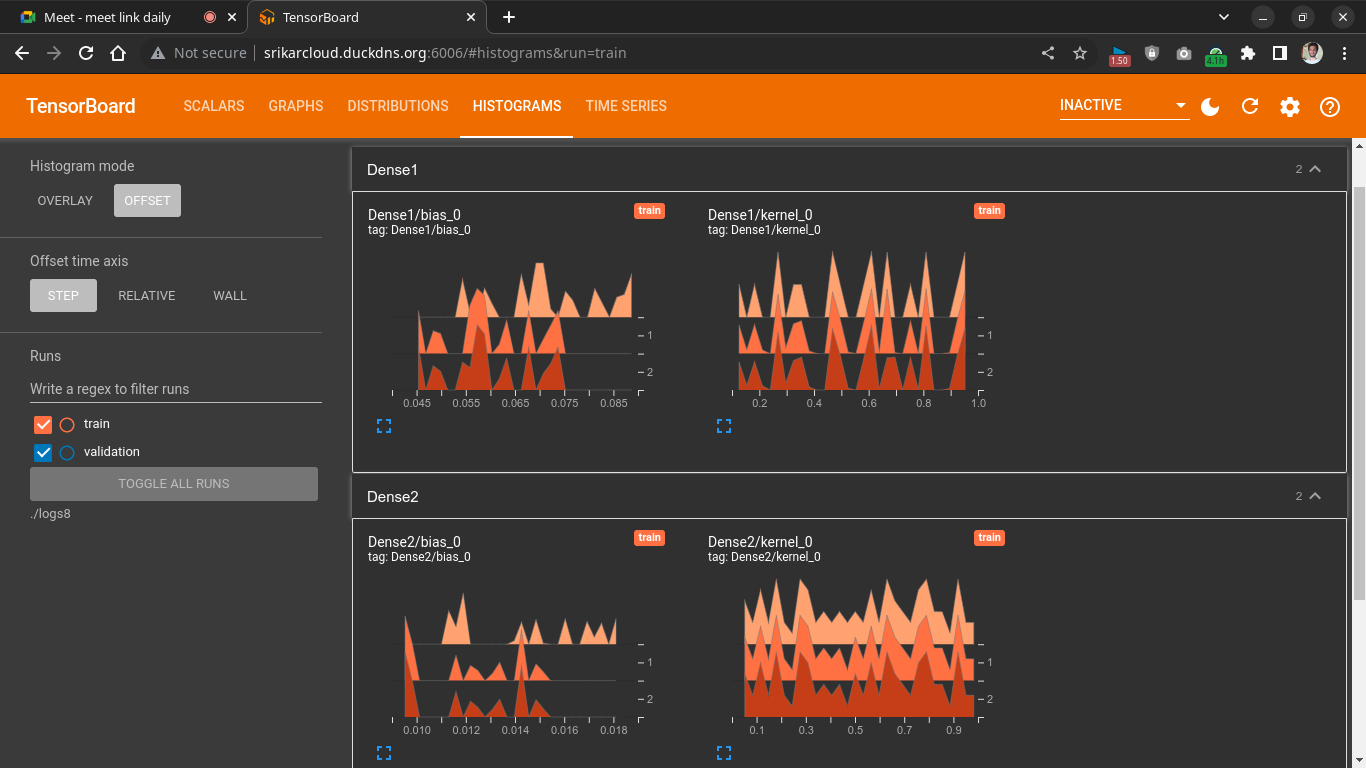
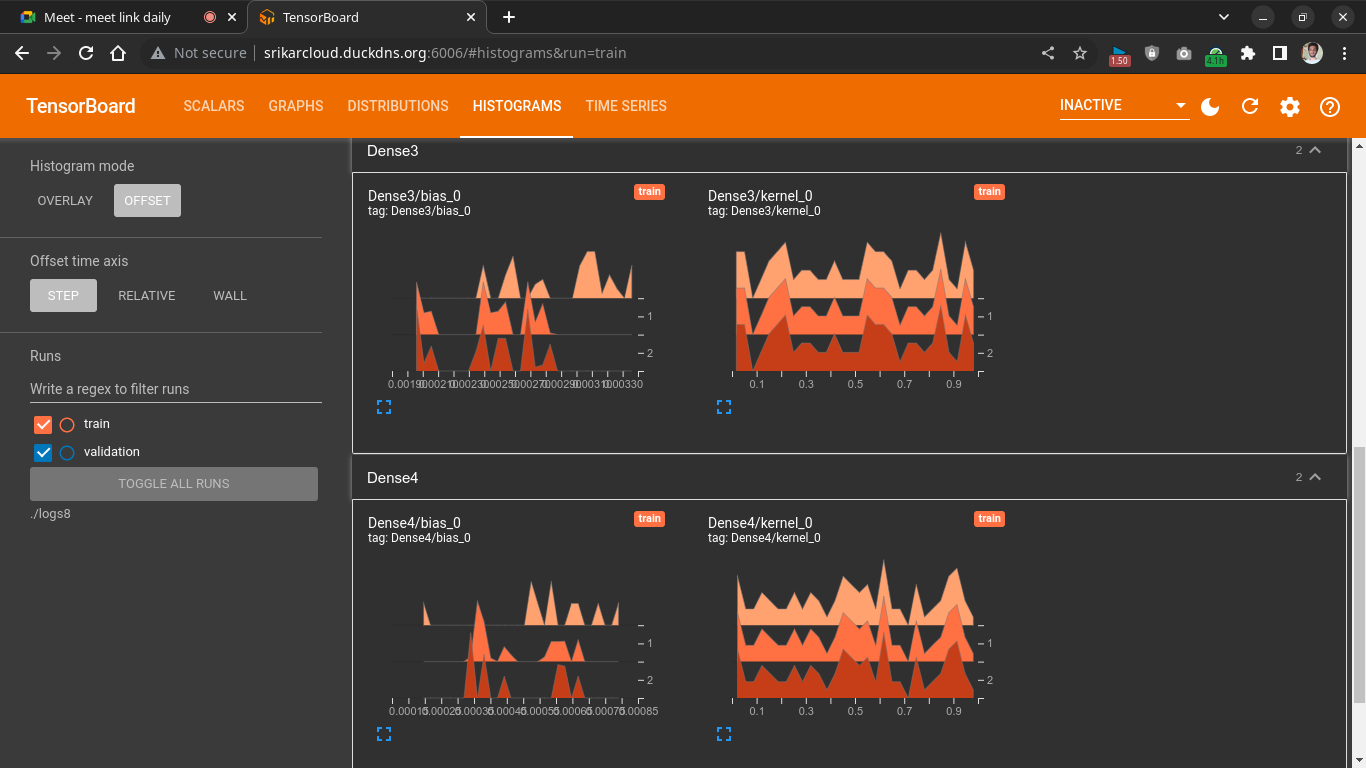
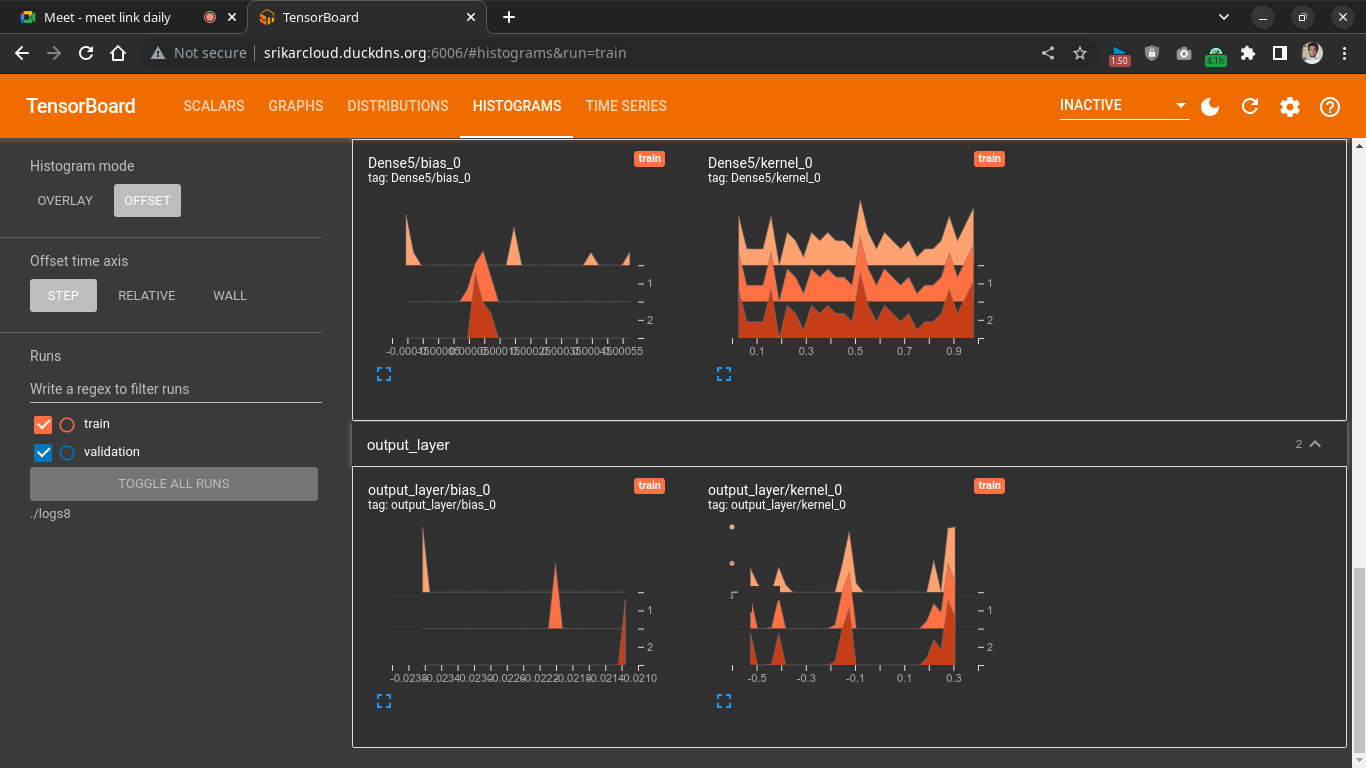

### we didn't initlize the weights of the layers well and also we use Tanh activation function so ,from the above screenshots, we can say that gradients are not updating.we get in to problem of vanishing gradient problem due to that gradients are not updating. 

<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>

In [12]:
inputs=Input(x.shape[1],name='Input_Layer')
layer0=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name="Dense1")(inputs)
layer1=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense2')(layer0)
layer2=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense3')(layer1)
layer3=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense4')(layer2)
layer4=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.),name='Dense5')(layer3)
outputs=Dense(1,name='output_layer',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0.,maxval=1.),activation='sigmoid')(layer4)
model=Model(inputs,outputs)
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD"),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir="logs600",
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
)
print('storing Logs for tensorboard in following directory : ',os.getcwd())

storing Logs for tensorboard in following directory :  /home/ubuntu/drive_kodakandlasrikar99/aaic data


In [14]:
%load_ext tensorboard
!rm -rf ./logs600/ 
%tensorboard --logdir './logs600' --host "0.0.0.0" --port 6002

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
model.fit(x,y,callbacks=[model_checkpoint_callback,metric,TerminateNaN(),tensorboard,earlystopping,plateau,schedule],epochs=30,validation_split=0.2)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/30
500/500 [==============================] - 4s 7ms/step - loss: 1.2459 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4860 - micro_f1_score: 0.5000 - auc_score: 0.5000 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.4860 - micro_f1_score: 0.5000 - auc_score: 0.5000 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.000949999934528023.
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6934 - val_accuracy: 0.4860 - micro_f1_score: 0.5000 - auc_score: 0.5000 - lr: 9.5000e-05


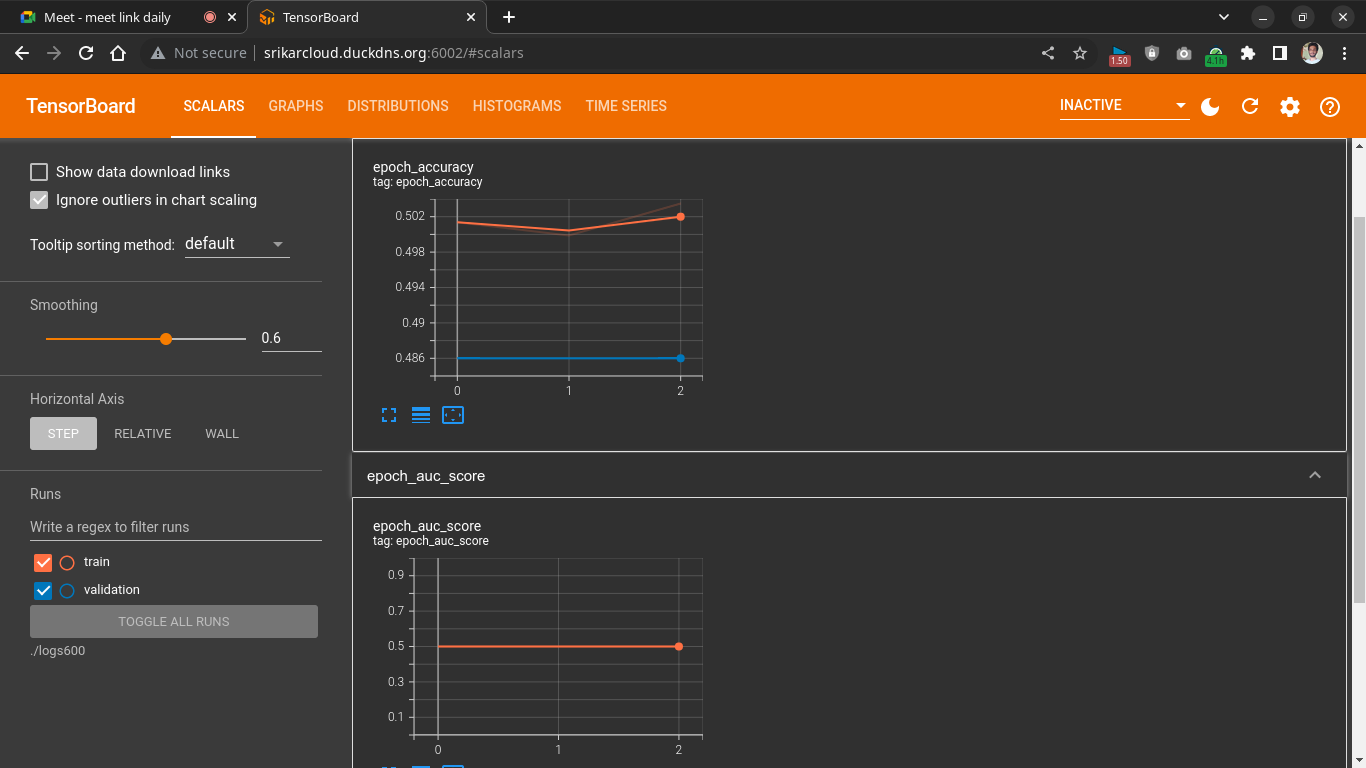
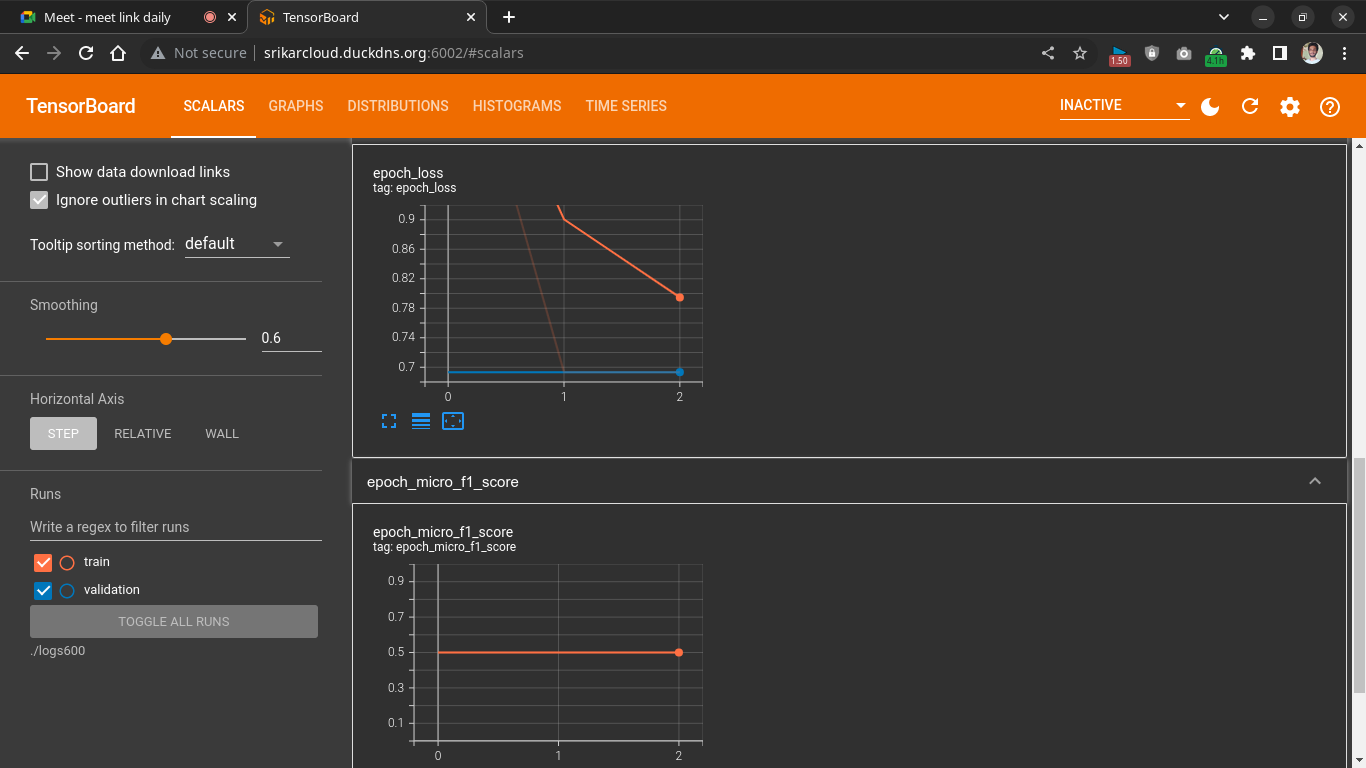
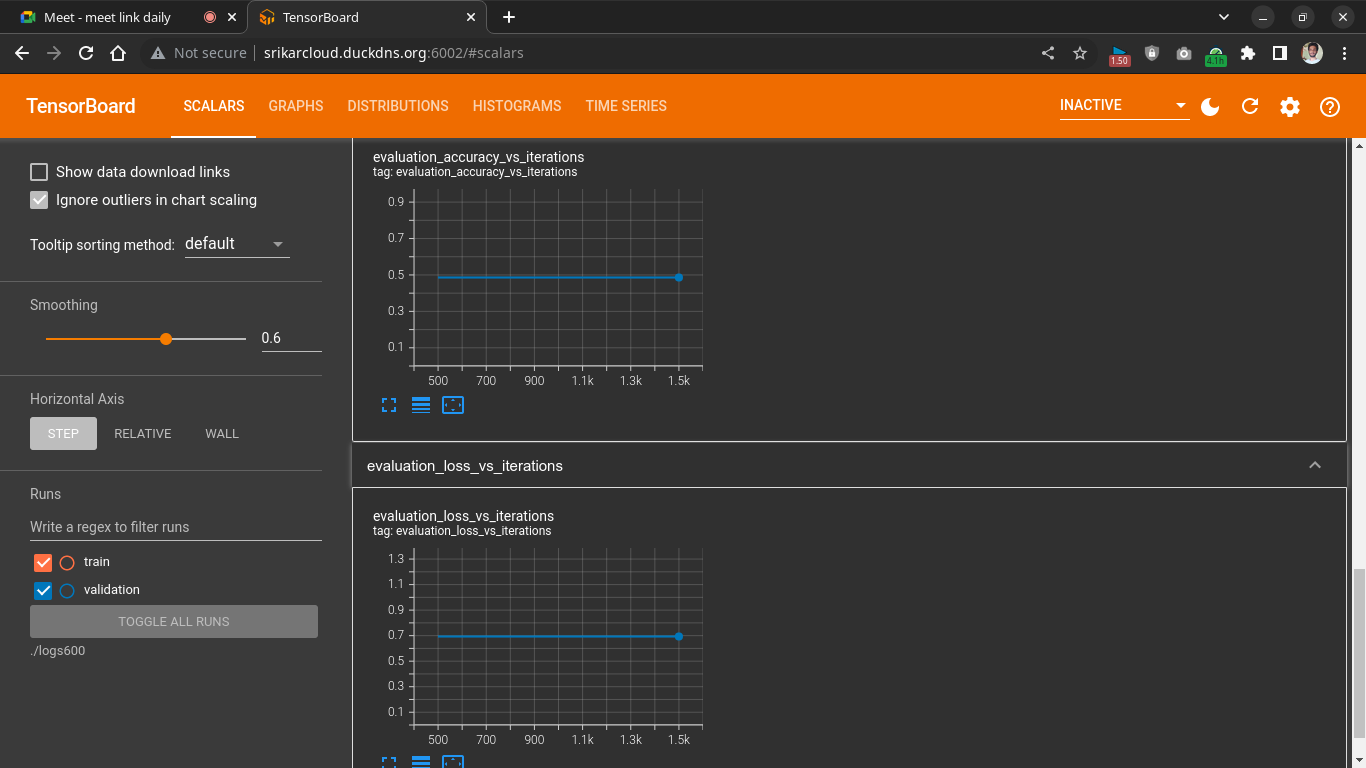
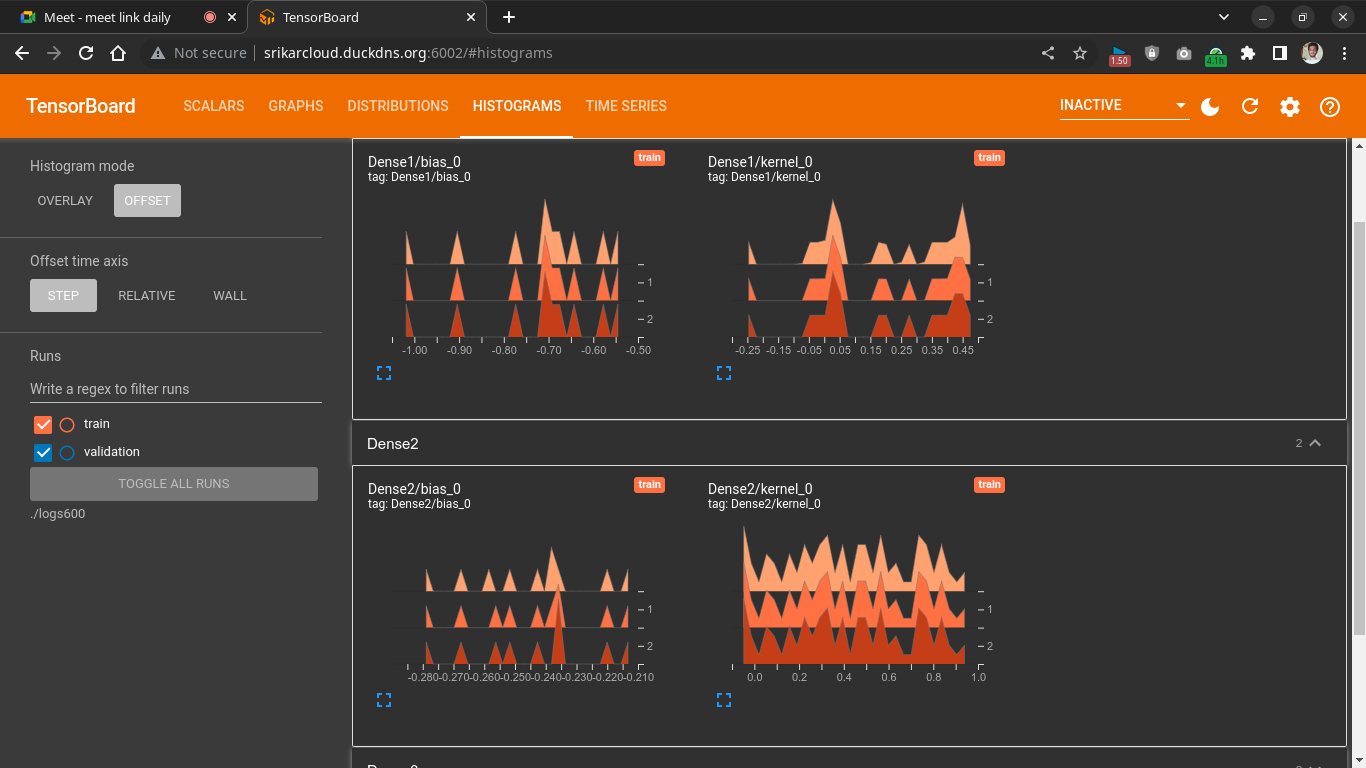
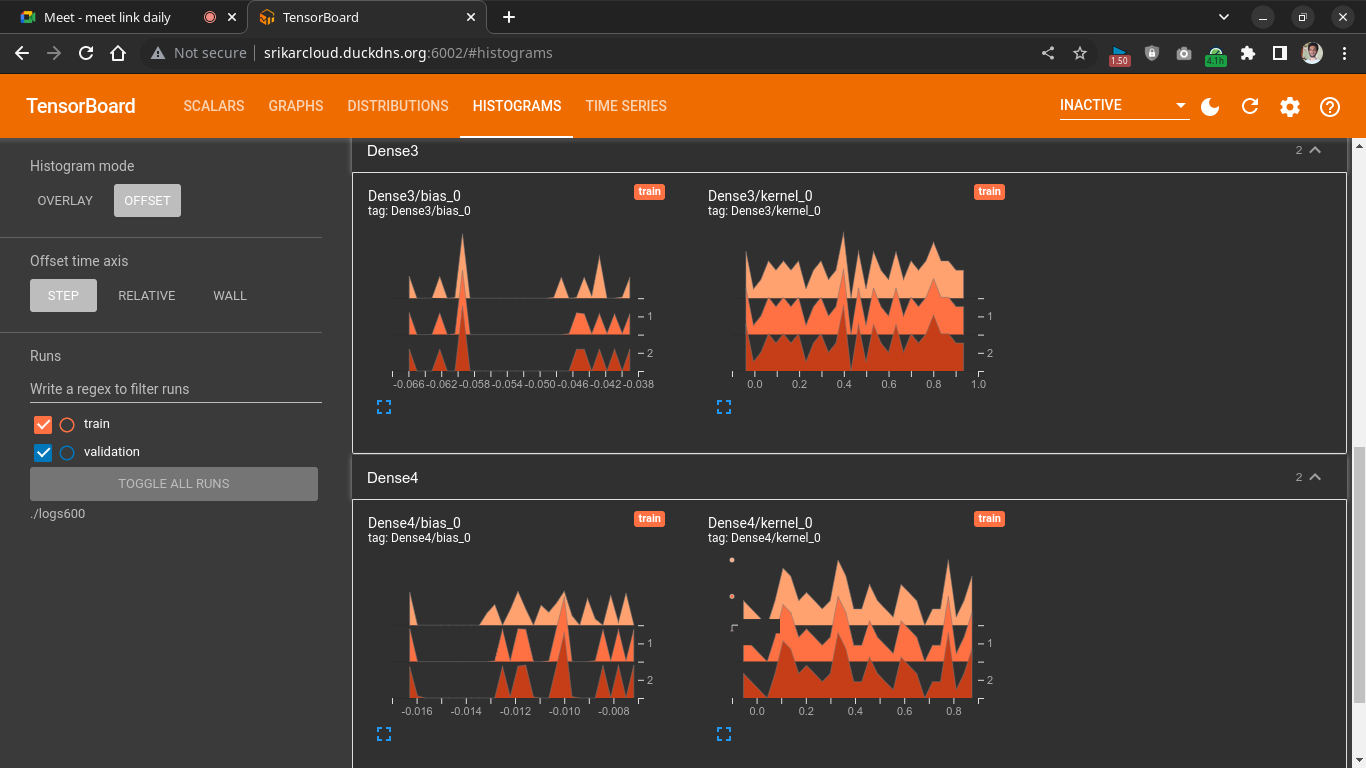
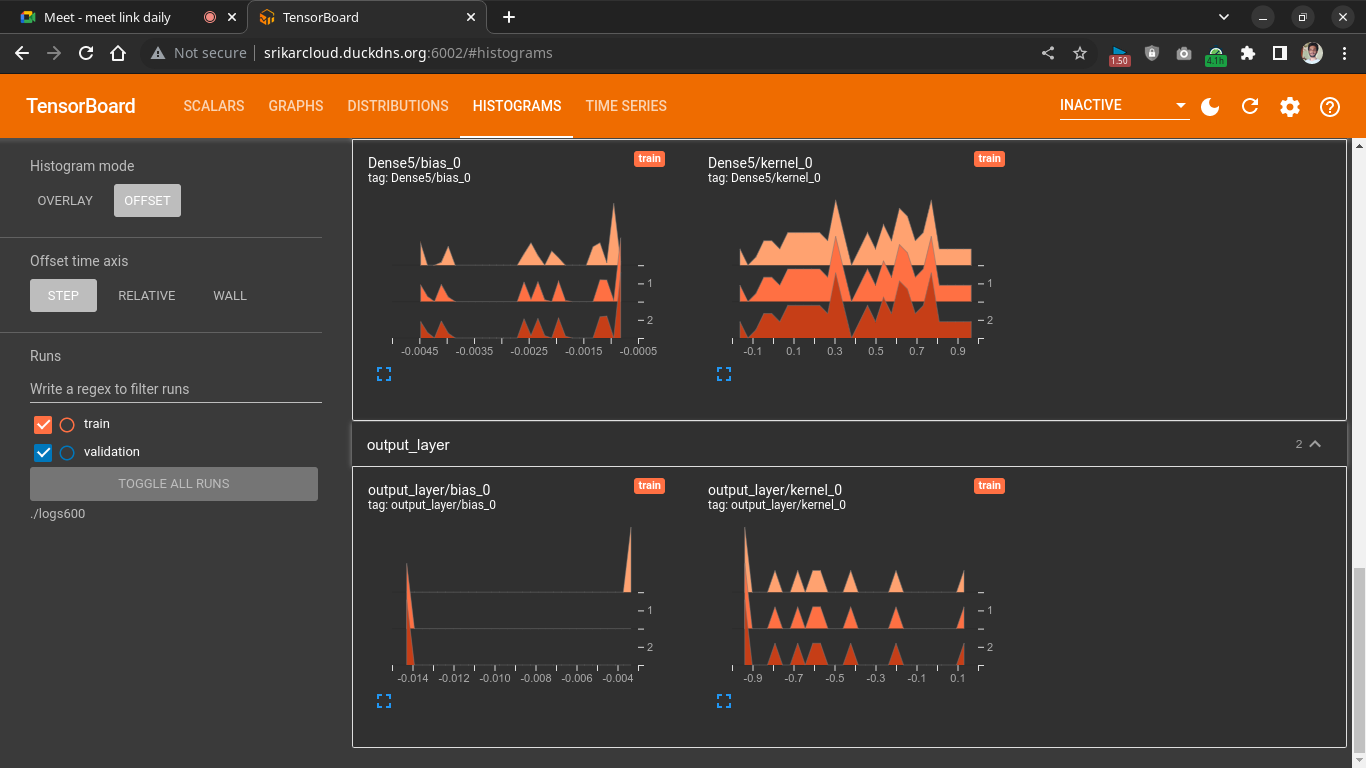

### we didn't initlize the weights of the layers well and also we use Relu activation function so ,from the above screenshots, we can say that gradients are not updating.we get in to problem of Dead activations problem, due to that gradients are not updating. 

<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>

In [16]:
inputs=Input(x.shape[1],name='Input_Layer')
layer0=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name="Dense1")(inputs)
layer1=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense2')(layer0)
layer2=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense3')(layer1)
layer3=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense4')(layer2)
layer4=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense5')(layer3)
outputs=Dense(1,name='output_layer',kernel_initializer=tf.keras.initializers.he_uniform(),activation='sigmoid')(layer4)
model=Model(inputs,outputs)
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD"),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir="logs510",
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
)
print('storing Logs for tensorboard in following directory : ',os.getcwd())

storing Logs for tensorboard in following directory :  /home/ubuntu/drive_kodakandlasrikar99/aaic data


In [18]:
%load_ext tensorboard
!rm -rf ./logs510/ 
%tensorboard --logdir './logs510' --host "0.0.0.0" --port 6011

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
model.fit(x,y,callbacks=[model_checkpoint_callback,metric,TerminateNaN(),tensorboard,earlystopping,plateau,schedule],epochs=30,validation_split=0.2)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/30
500/500 [==============================] - 4s 7ms/step - loss: 0.6345 - accuracy: 0.6367 - val_loss: 0.6388 - val_accuracy: 0.6510 - micro_f1_score: 0.6560 - auc_score: 0.7306 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6087 - accuracy: 0.6666 - val_loss: 0.6264 - val_accuracy: 0.6572 - micro_f1_score: 0.6626 - auc_score: 0.7374 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009499999787658453.
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6053 - accuracy: 0.6676 - val_loss: 0.6091 - val_accuracy: 0.6587 - micro_f1_score: 0.6654 - auc_score: 0.7321 - lr: 0.0095

Epoch 4: LearningRateScheduler setting learning rate to 0.009499999694526196.
Epoch 4/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6063 - a

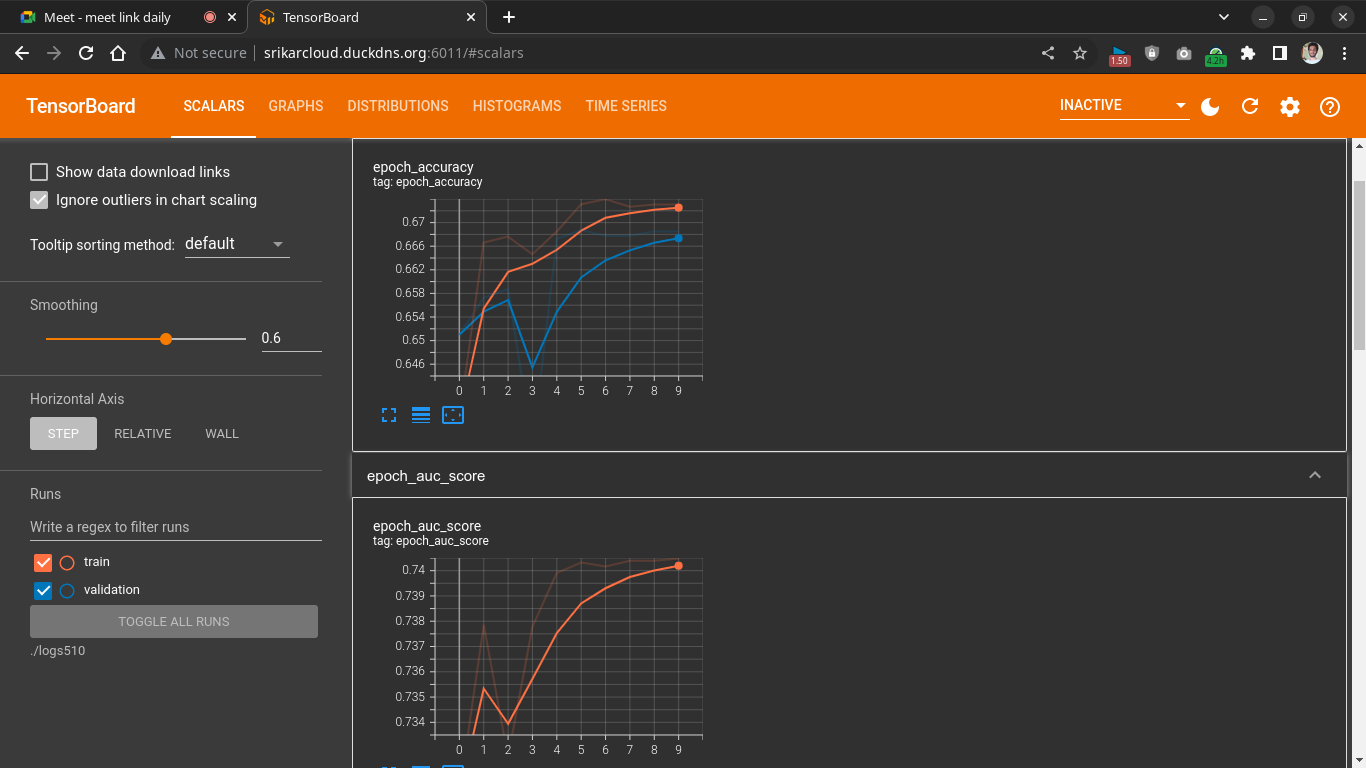
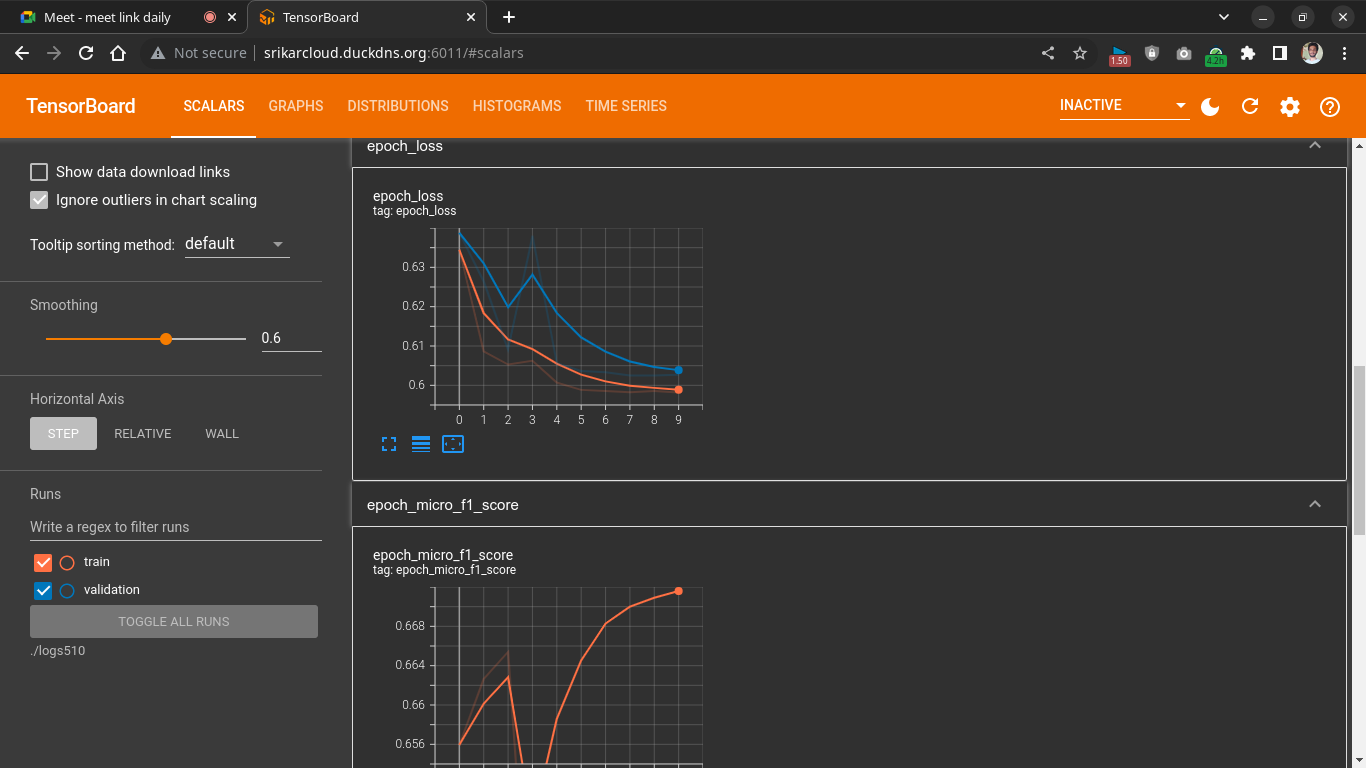
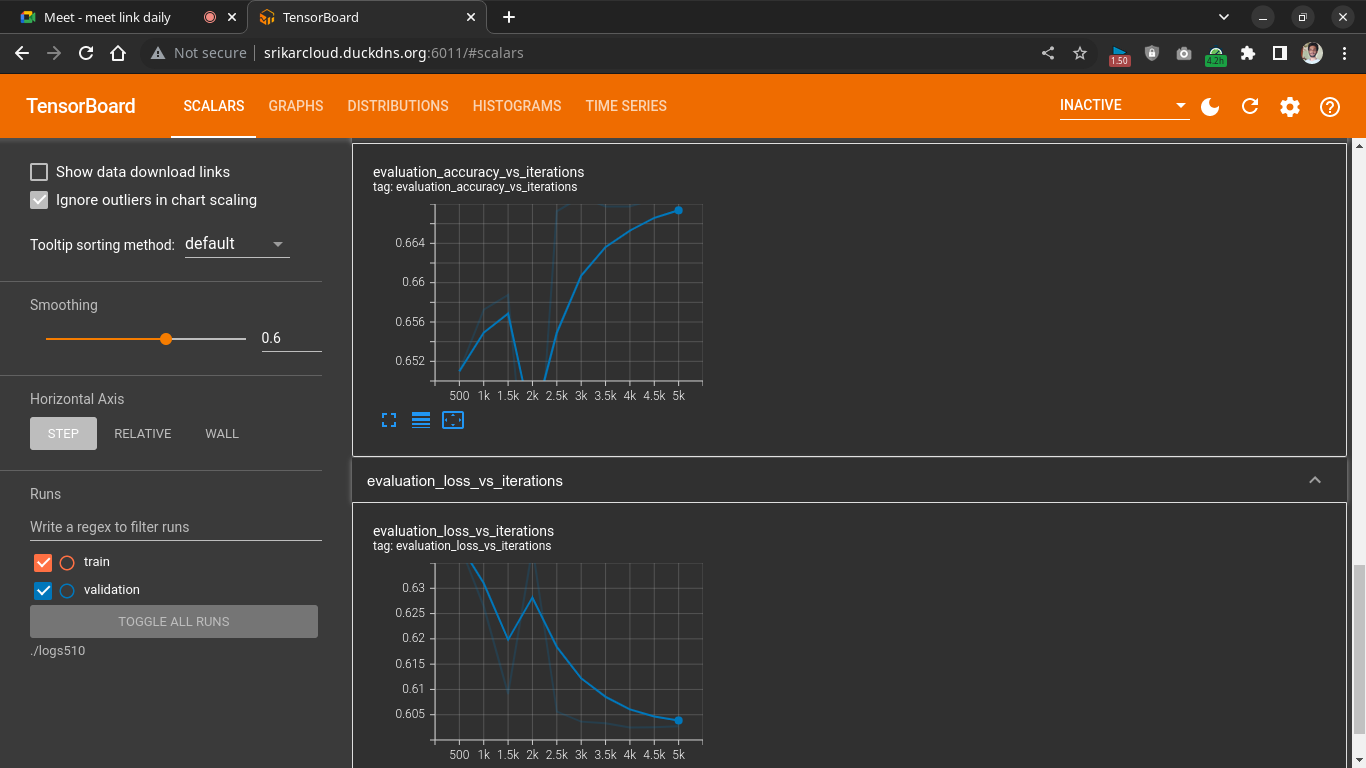
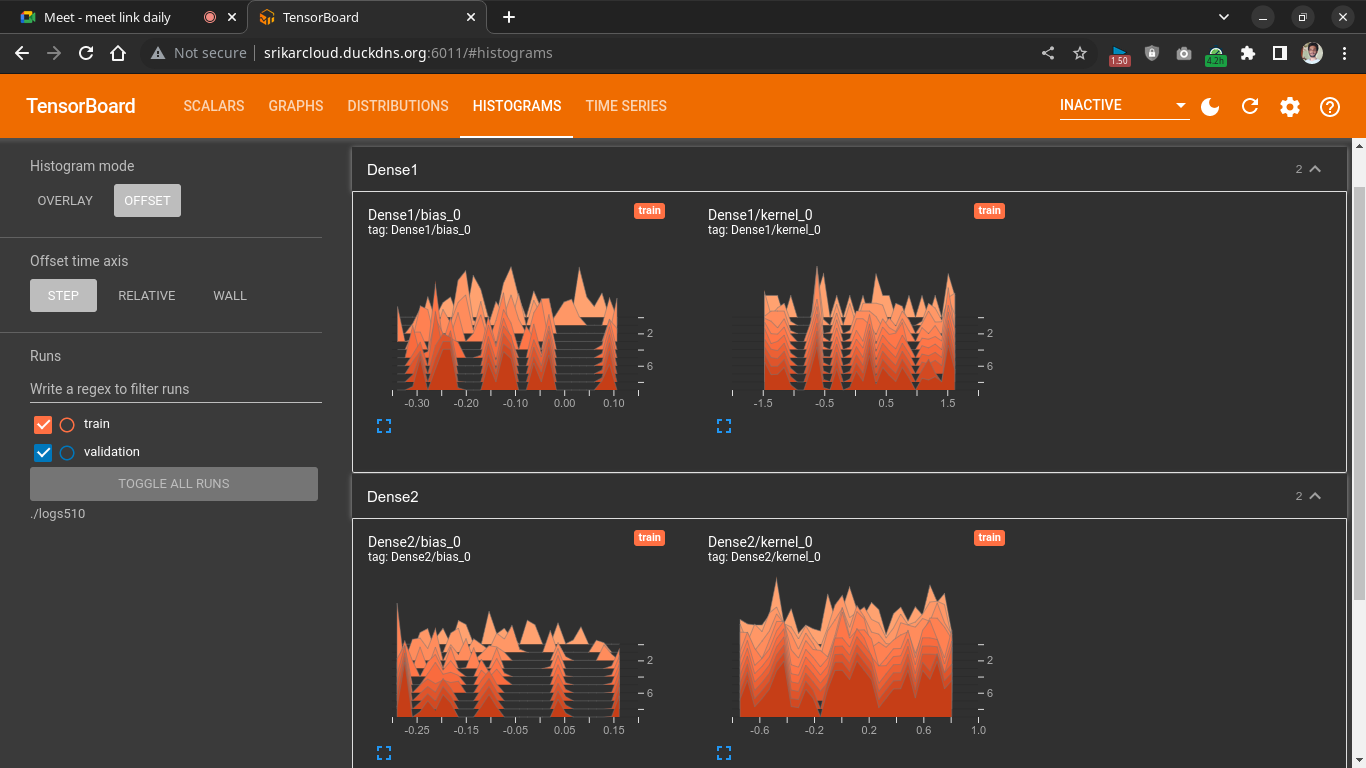
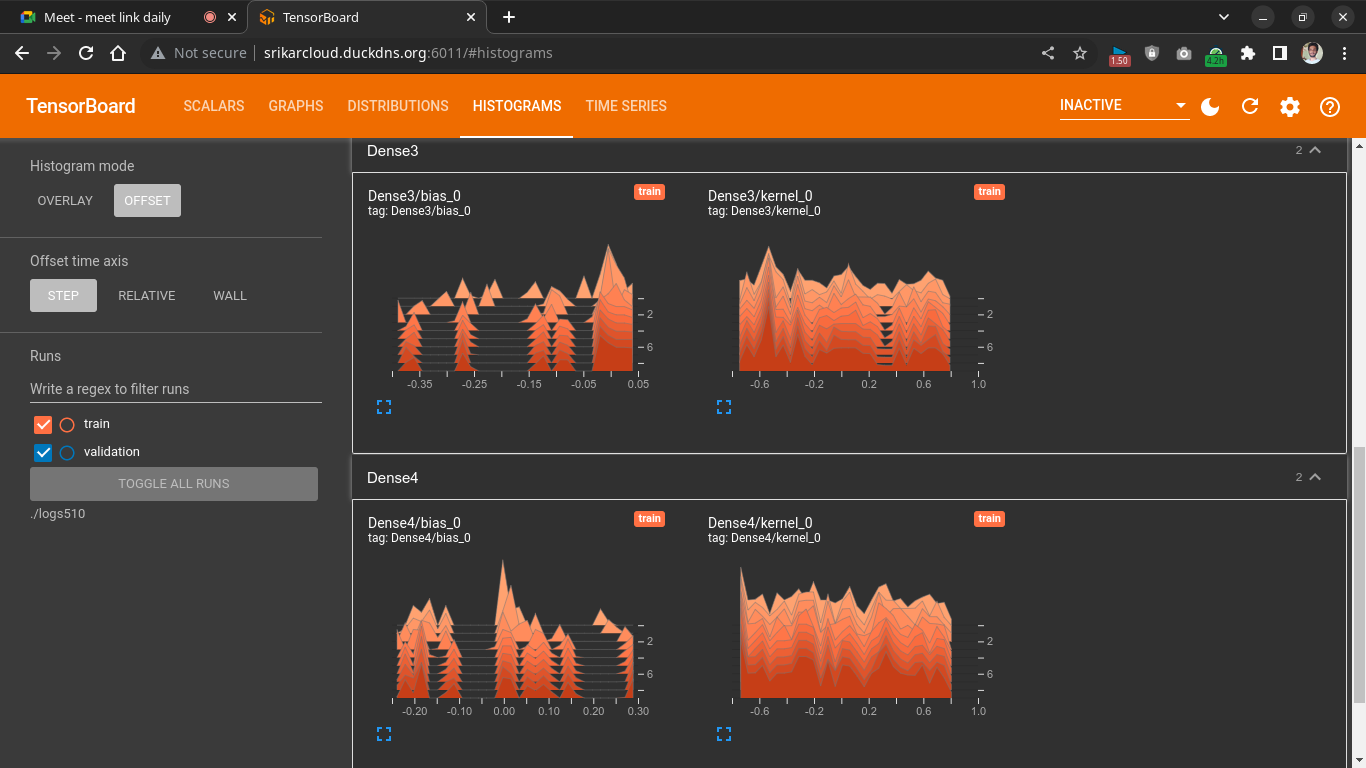
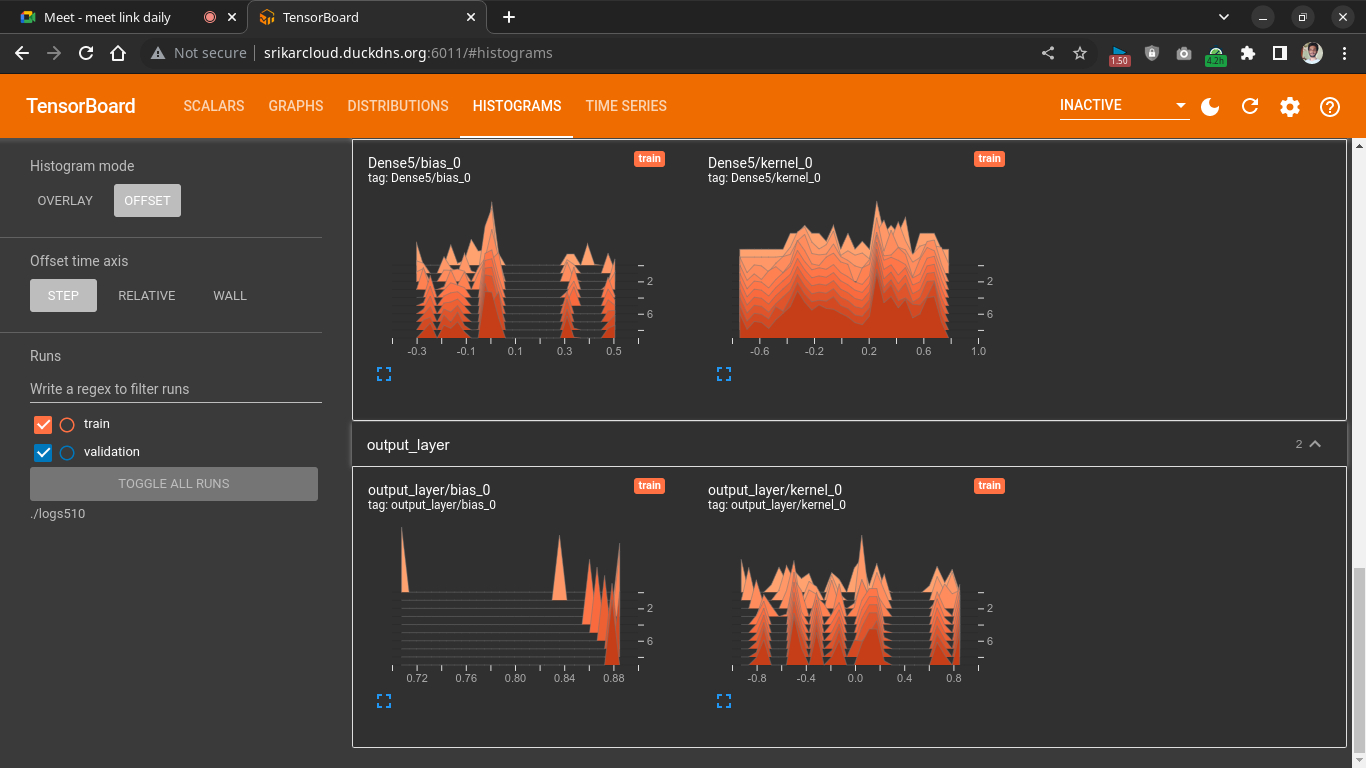

### we initilized the layers well ,so the problem of Dead activation was decreased , so the model was able to train well and gave good results .




<pre>
<b>Model-4</b>
<pre>
1. Try with adam optimizer and relu activation function with he initlization to get better accuracy/f1 score.  
</pre>
</pre>

In [20]:
inputs=Input(x.shape[1],name='Input_Layer')
layer0=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name="Dense1")(inputs)
layer1=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense2')(layer0)
layer2=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense3')(layer1)
layer3=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense4')(layer2)
layer4=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(),name='Dense5')(layer3)
outputs=Dense(1,name='output_layer',kernel_initializer=tf.keras.initializers.he_uniform(),activation='sigmoid')(layer4)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir="logs518",
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
)
print('storing Logs for tensorboard in following directory : ',os.getcwd())

storing Logs for tensorboard in following directory :  /home/ubuntu/drive_kodakandlasrikar99/aaic data


In [22]:
%load_ext tensorboard
!rm -rf ./logs517/ 
%tensorboard --logdir './logs518' --host "0.0.0.0" --port 6099

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
model.fit(x,y,callbacks=[model_checkpoint_callback,metric,TerminateNaN(),tensorboard,earlystopping,plateau,schedule],epochs=30,validation_split=0.2)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/30
500/500 [==============================] - 4s 7ms/step - loss: 0.6764 - accuracy: 0.5753 - val_loss: 0.6570 - val_accuracy: 0.6522 - micro_f1_score: 0.6486 - auc_score: 0.7098 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6228 - accuracy: 0.6606 - val_loss: 0.6075 - val_accuracy: 0.6653 - micro_f1_score: 0.6716 - auc_score: 0.7369 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0009500000451225787.
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.6042 - accuracy: 0.6696 - val_loss: 0.6047 - val_accuracy: 0.6672 - micro_f1_score: 0.6739 - auc_score: 0.7377 - lr: 9.5000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009500000160187483.
Epoch 4/30
500/500 [==============================] - 2s 4ms/step - loss: 0.

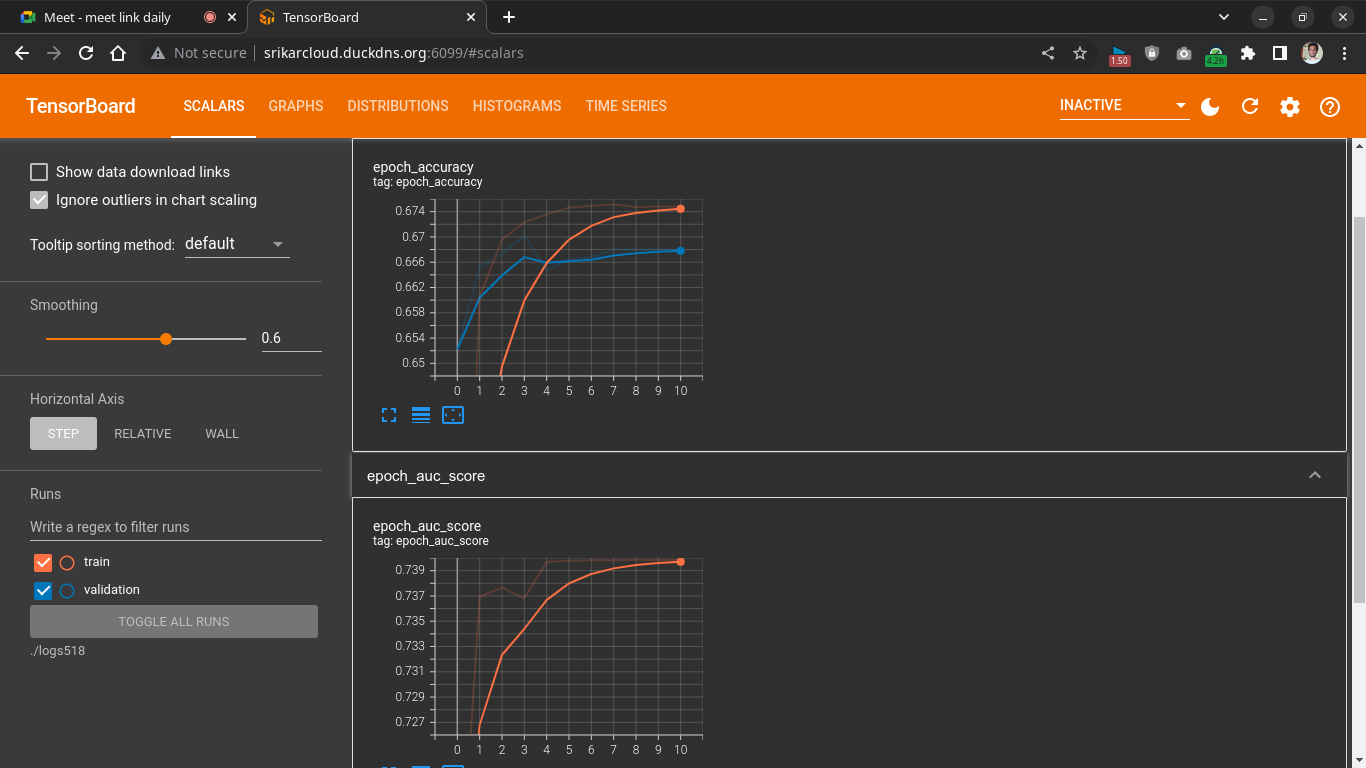
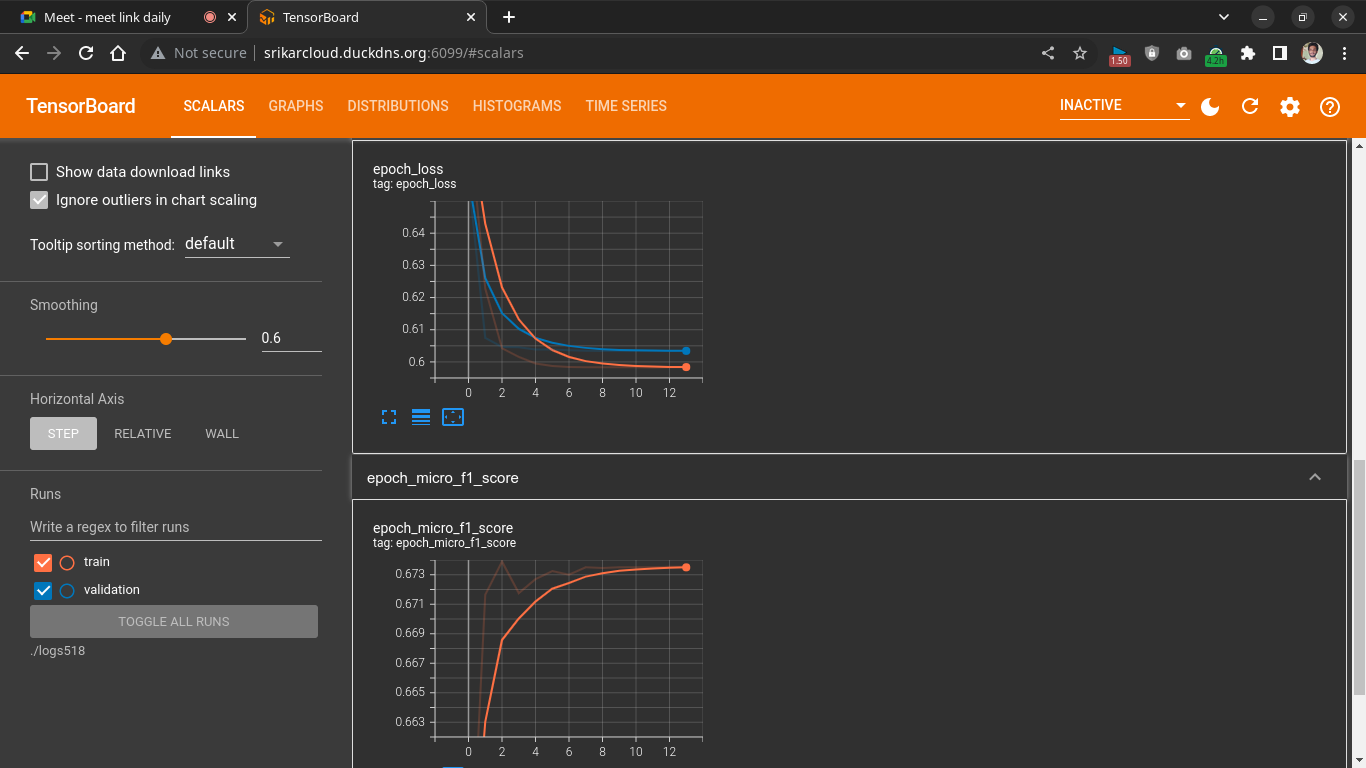
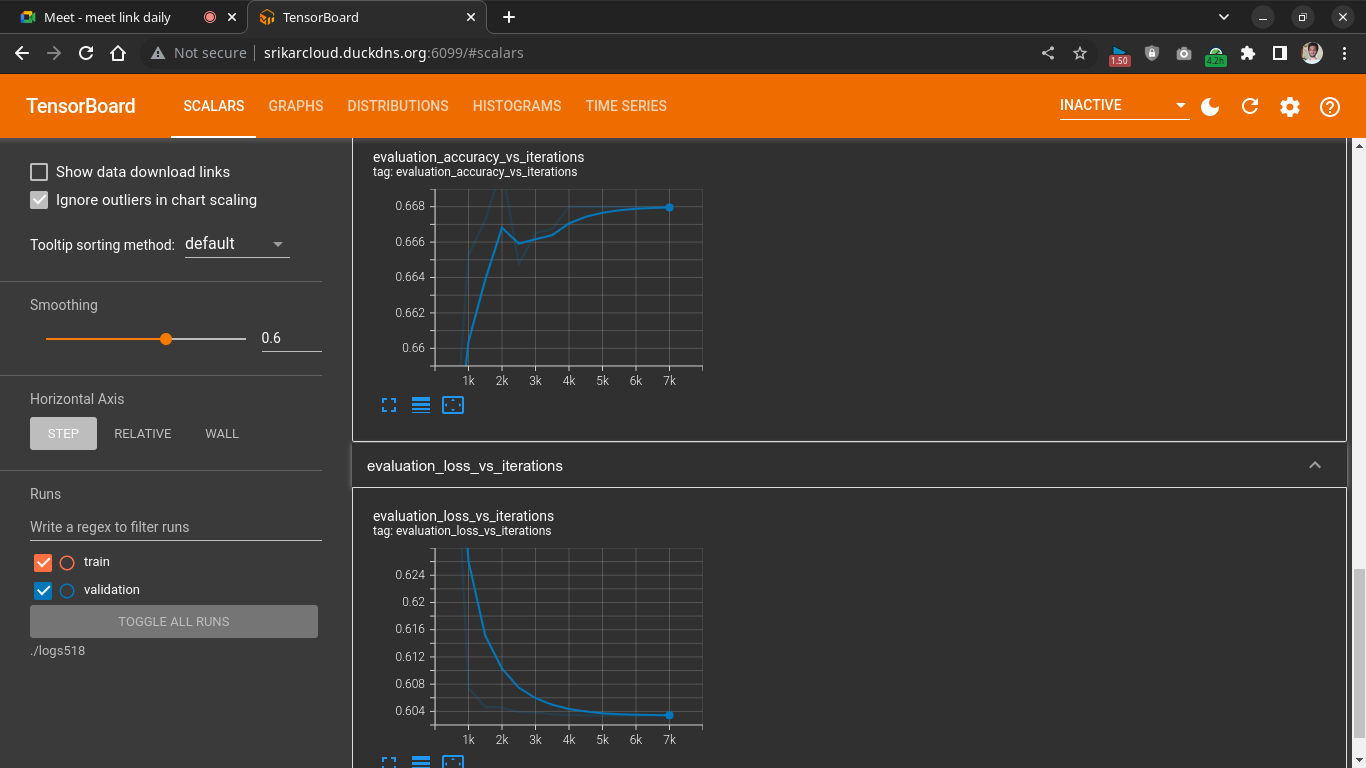
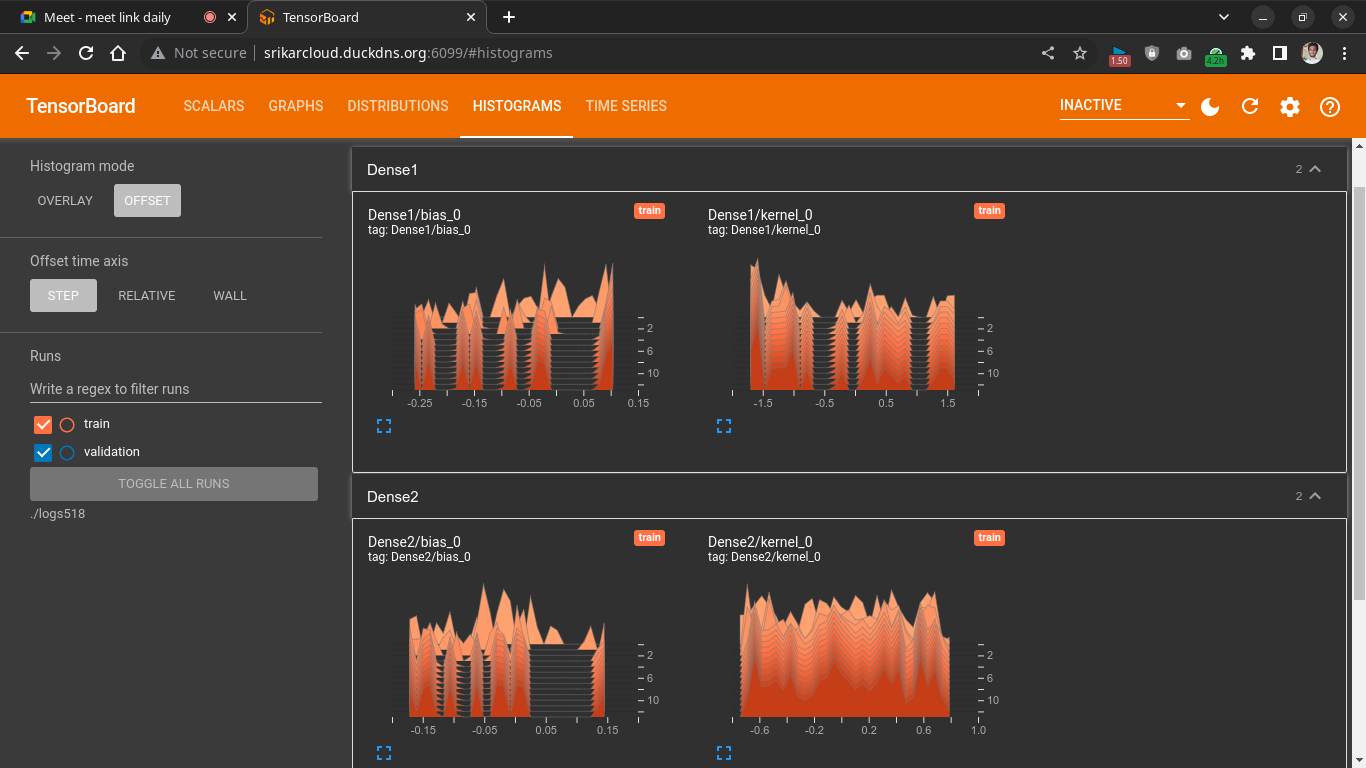
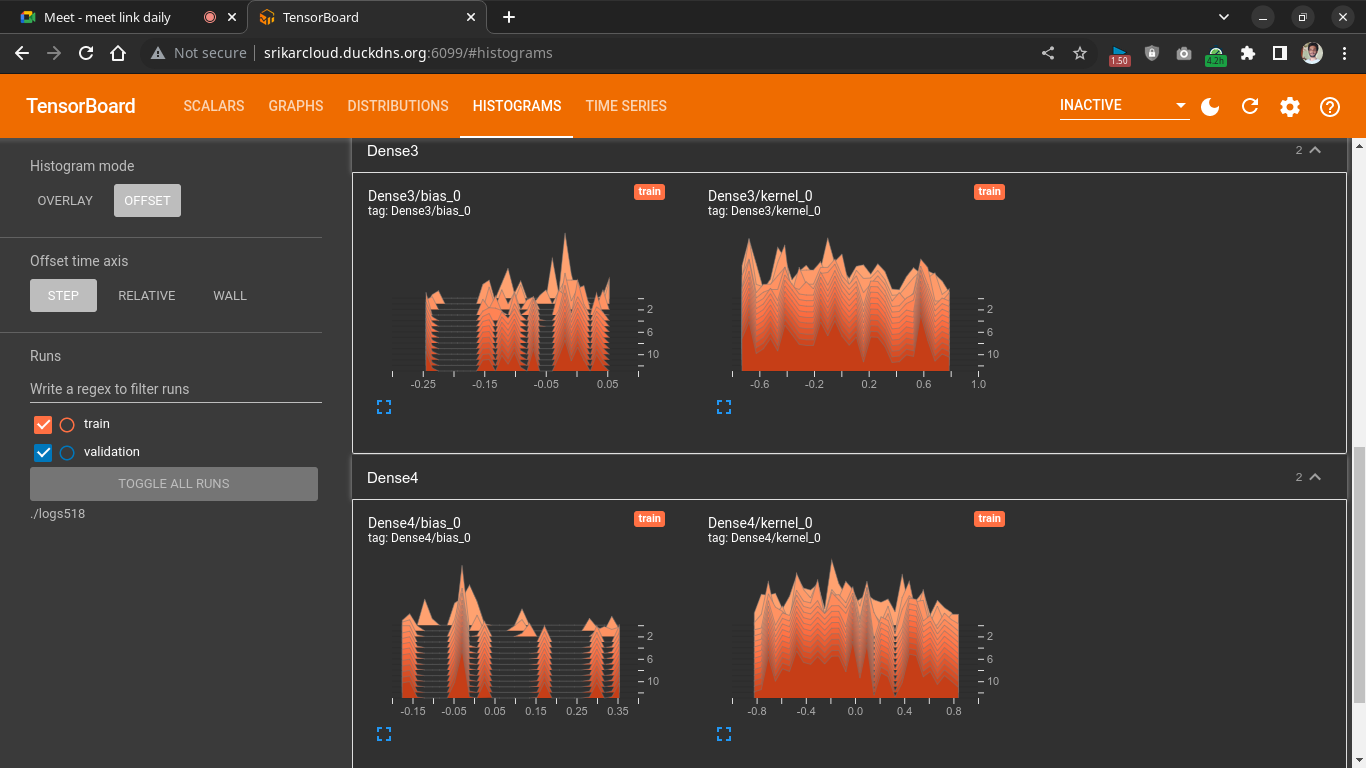
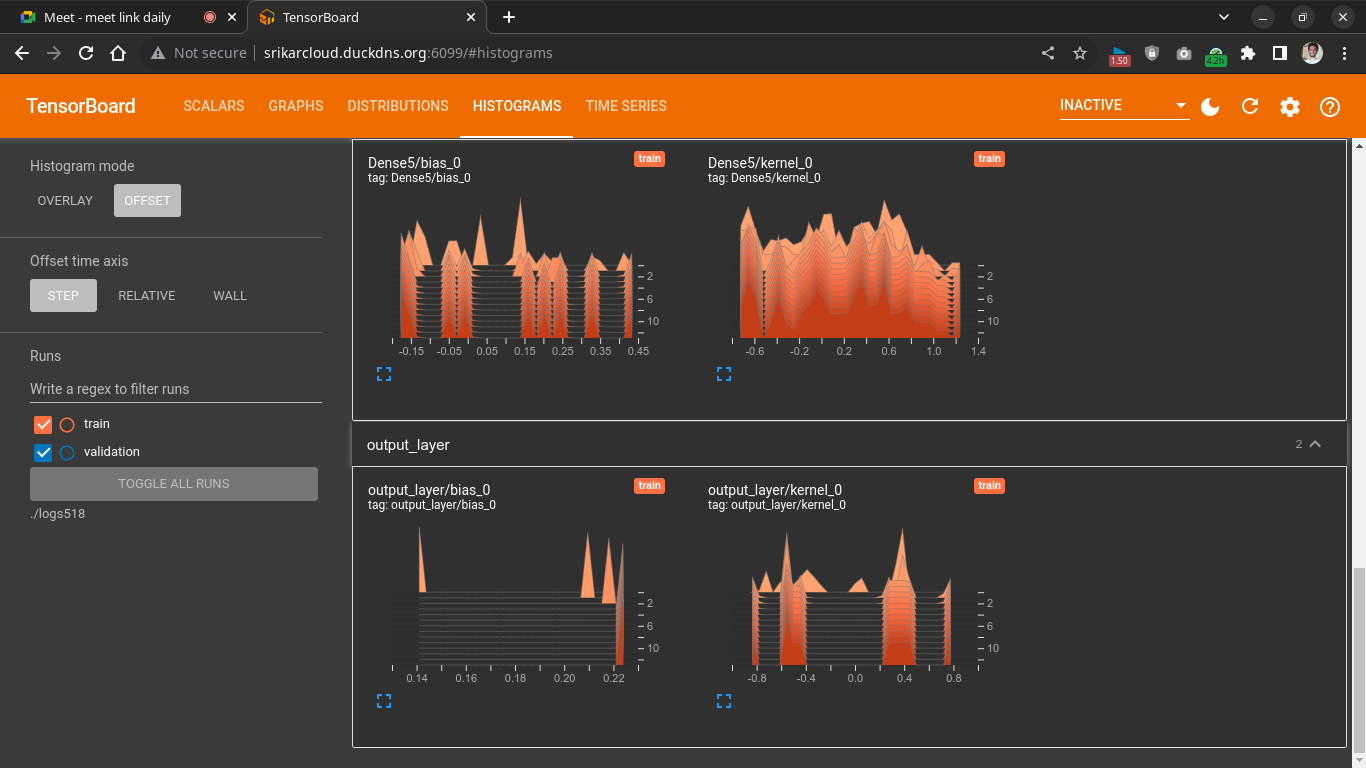

### we initilized the layers well ,so the problem of Dead activation was decreased , so the model was able to train well and gave good results .